# Predicción de recomendación de servicio

Este proyecto se realiza para encontrar patrones y tendencias en los datos que nos permitan conocer si una persona através de una encuesta recomendaría los servicios que la empresa ofrece o no.

In [1]:
# importando librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
pd.set_option("display.max_columns", None)

# Importando el dataset

In [2]:
# importando el documento a trabajar
df = pd.read_excel("bd_encuesta.xlsx")
df.head(2)

,Fecha,ID de respuesta,Nombre del cliente,Canal envio,Idioma del usuario,importancia_conocimiento_de_marcas: donde 1 es lo mas importante y 4 no lo consideras importante,importancia experiencia cliente: donde 1 es lo mas importante y 4 no lo consideras importante,importancia talento humano: donde 1 es lo mas importante y 4 no lo consideras importante,importancia tecnologia e innivación: donde 1 es lo mas importante y 4 no lo consideras importante,amplia la importancia de atributos,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo","En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?","NPS: escala del 0 al 10, donde 0 es no lo recomendaría y 10 definitivamente sí lo recomendaria. Dinos qué tan probable es que recomiendes nuestros servicios","NPS: En una escala de 0 a 10, donde 0 es la calificación más baja y 10 la más alta, ¿Qué tan probable es que recomiendes nuestros servicios?",Cuéntanos el motivo de tu calificación
0,2023-11-16 13:30:31.585,1,cliente 1,email,ES,2.0,3.0,4.0,1.0,amabilidad y comprension,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Promotor,9,Promotor,10,Tienen las competencias y capacidades necesari...
1,2023-11-16 14:54:57.335,2,cliente 2,email,ES,3.0,1.0,2.0,4.0,cercania,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Promotor,10,Promotor,10,siempre dispuestos a brindar la mejor asesoria...


# Procesamiento del dataset

In [3]:
# eliminando columnas que no son relevantes por el momento para el analisis requerido
df.drop(columns=["Fecha", "ID de respuesta", "Nombre del cliente", "Canal envio", "Idioma del usuario", "amplia la importancia de atributos", "Cuéntanos el motivo de tu calificación", "NPS: escala del 0 al 10, donde 0 es no lo recomendaría y 10 definitivamente sí lo recomendaria. Dinos qué tan probable es que recomiendes nuestros servicios", "En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ? - Grupo"],inplace=True)
df.head(2)

,importancia_conocimiento_de_marcas: donde 1 es lo mas importante y 4 no lo consideras importante,importancia experiencia cliente: donde 1 es lo mas importante y 4 no lo consideras importante,importancia talento humano: donde 1 es lo mas importante y 4 no lo consideras importante,importancia tecnologia e innivación: donde 1 es lo mas importante y 4 no lo consideras importante,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?","NPS: En una escala de 0 a 10, donde 0 es la calificación más baja y 10 la más alta, ¿Qué tan probable es que recomiendes nuestros servicios?"
0,2.0,3.0,4.0,1.0,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,9,10
1,3.0,1.0,2.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,10,10


In [4]:
# renombrar columnas para mejor visualización
df.rename(columns={"NPS: En una escala de 0 a 10, donde 0 es la calificación más baja y 10 la más alta, ¿Qué tan probable es que recomiendes nuestros servicios?": "Recomiendas nuestros servicios?"}, inplace=True)
df.rename(columns={"importancia experiencia cliente: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia experiencia cliente"}, inplace=True)
df.rename(columns={"importancia talento humano: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia talento humano"}, inplace=True)
df.rename(columns={"importancia tecnologia e innivación: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia tecnologia e innivación"}, inplace=True)
df.rename(columns={"importancia_conocimiento_de_marcas: donde 1 es lo mas importante y 4 no lo consideras importante": "importancia conocimiento marcas"}, inplace=True)
df.rename(columns={"En la misma escala de 0 a 10, en caso que necesites nuevos servicios de consultoria, ¿Qué tan probable es que consideres a nuestra empresa como tu primera opción ?": "Consideras a nuestra empresa como tu primera opción?"}, inplace=True)
df.head(2)

,importancia conocimiento marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,Consideras a nuestra empresa como tu primera opción?,Recomiendas nuestros servicios?
0,2.0,3.0,4.0,1.0,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,9,10
1,3.0,1.0,2.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,10,10


In [5]:
# verificando los valores de la columna objetivo
df["Recomiendas nuestros servicios?"].value_counts()

Recomiendas nuestros servicios?
10    33
9     19
8      7
7      3
3      2
6      2
2      2
1      1
5      1
Name: count, dtype: int64

In [6]:
# verificando los valores de la columna "Consideras a nuestra empresa como tu primera opción?"
df["Consideras a nuestra empresa como tu primera opción?"].value_counts()

Consideras a nuestra empresa como tu primera opción?
10    28
9     23
8     11
7      3
3      2
5      1
1      1
4      1
Name: count, dtype: int64

In [7]:
# transformando la columna objetivo y la columna "Consideras a nuestra empresa como tu primera opción?", donde en el rango del 0-8 será "No recomendable" y del 9-10 será "Recomendable"
df["Recomiendas nuestros servicios?"] = df["Recomiendas nuestros servicios?"].apply(lambda x: "Si" if x >= 9 else "No")
df["Consideras a nuestra empresa como tu primera opción?"] = df["Consideras a nuestra empresa como tu primera opción?"].apply(lambda x: "Si" if x >= 9 else "No")
df.head(2)

,importancia conocimiento marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,Consideras a nuestra empresa como tu primera opción?,Recomiendas nuestros servicios?
0,2.0,3.0,4.0,1.0,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Si,Si
1,3.0,1.0,2.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Si,Si


In [8]:
# verificando si existen valores NaN
df.isna().sum()

importancia conocimiento marcas                                          1
importancia experiencia cliente                                          1
importancia talento humano                                               1
importancia tecnologia e innivación                                      1
Cómo calificas los resultados entregados en las consultorías?            0
Cómo calificas la Metodología de desarrollo de los proyectos?            0
Qué tan satisfecho estás con las alternativas dadas para tu solución?    0
Qué tan satisfecho estás con los tiempo de solución ?                    0
Cómo calificas la importancia que  le damos a nuestros clientes?         0
Qué tan fácil fue obtener una solución?                                  0
Que tan satisfecho estás con el conocimiento de nuestro personal?        0
Consideras a nuestra empresa como tu primera opción?                     0
Recomiendas nuestros servicios?                                          0
dtype: int64

In [9]:
# reemplazando valores faltantes por la moda (valor mas comun)
for column in df.columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

df.isna().sum()

importancia conocimiento marcas                                          0
importancia experiencia cliente                                          0
importancia talento humano                                               0
importancia tecnologia e innivación                                      0
Cómo calificas los resultados entregados en las consultorías?            0
Cómo calificas la Metodología de desarrollo de los proyectos?            0
Qué tan satisfecho estás con las alternativas dadas para tu solución?    0
Qué tan satisfecho estás con los tiempo de solución ?                    0
Cómo calificas la importancia que  le damos a nuestros clientes?         0
Qué tan fácil fue obtener una solución?                                  0
Que tan satisfecho estás con el conocimiento de nuestro personal?        0
Consideras a nuestra empresa como tu primera opción?                     0
Recomiendas nuestros servicios?                                          0
dtype: int64

# Análisis del dataset

In [10]:
print(f'Este dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas')

Este dataset contiene 70 filas y 13 columnas


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   importancia conocimiento marcas                                        70 non-null     float64
 1   importancia experiencia cliente                                        70 non-null     float64
 2   importancia talento humano                                             70 non-null     float64
 3   importancia tecnologia e innivación                                    70 non-null     float64
 4   Cómo calificas los resultados entregados en las consultorías?          70 non-null     object 
 5   Cómo calificas la Metodología de desarrollo de los proyectos?          70 non-null     object 
 6   Qué tan satisfecho estás con las alternativas dadas para tu solución?  70 non-null     objec

In [12]:
# estadistica de la data numerica
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
importancia conocimiento marcas,70.0,2.19,1.08,1.0,1.0,2.0,3.0,4.0
importancia experiencia cliente,70.0,1.94,1.03,1.0,1.0,2.0,3.0,4.0
importancia talento humano,70.0,2.74,1.00,1.0,2.0,3.0,3.0,4.0
importancia tecnologia e innivación,70.0,3.13,0.98,1.0,2.0,3.0,4.0,4.0


In [13]:
# estadistica de la data categorica
df.describe(include = "O").T

,count,unique,top,freq
Cómo calificas los resultados entregados en las consultorías?,70,4,Bueno,27
Cómo calificas la Metodología de desarrollo de los proyectos?,70,4,Muy bueno,33
Qué tan satisfecho estás con las alternativas dadas para tu solución?,70,4,Muy bueno,37
Qué tan satisfecho estás con los tiempo de solución ?,70,4,Muy bueno,30
Cómo calificas la importancia que le damos a nuestros clientes?,70,4,Bueno,36
Qué tan fácil fue obtener una solución?,70,4,Muy bueno,31
Que tan satisfecho estás con el conocimiento de nuestro personal?,70,4,Muy bueno,36
Consideras a nuestra empresa como tu primera opción?,70,2,Si,51
Recomiendas nuestros servicios?,70,2,Si,52


# Análisis Exploratorio de datos

#### Análisis categórico

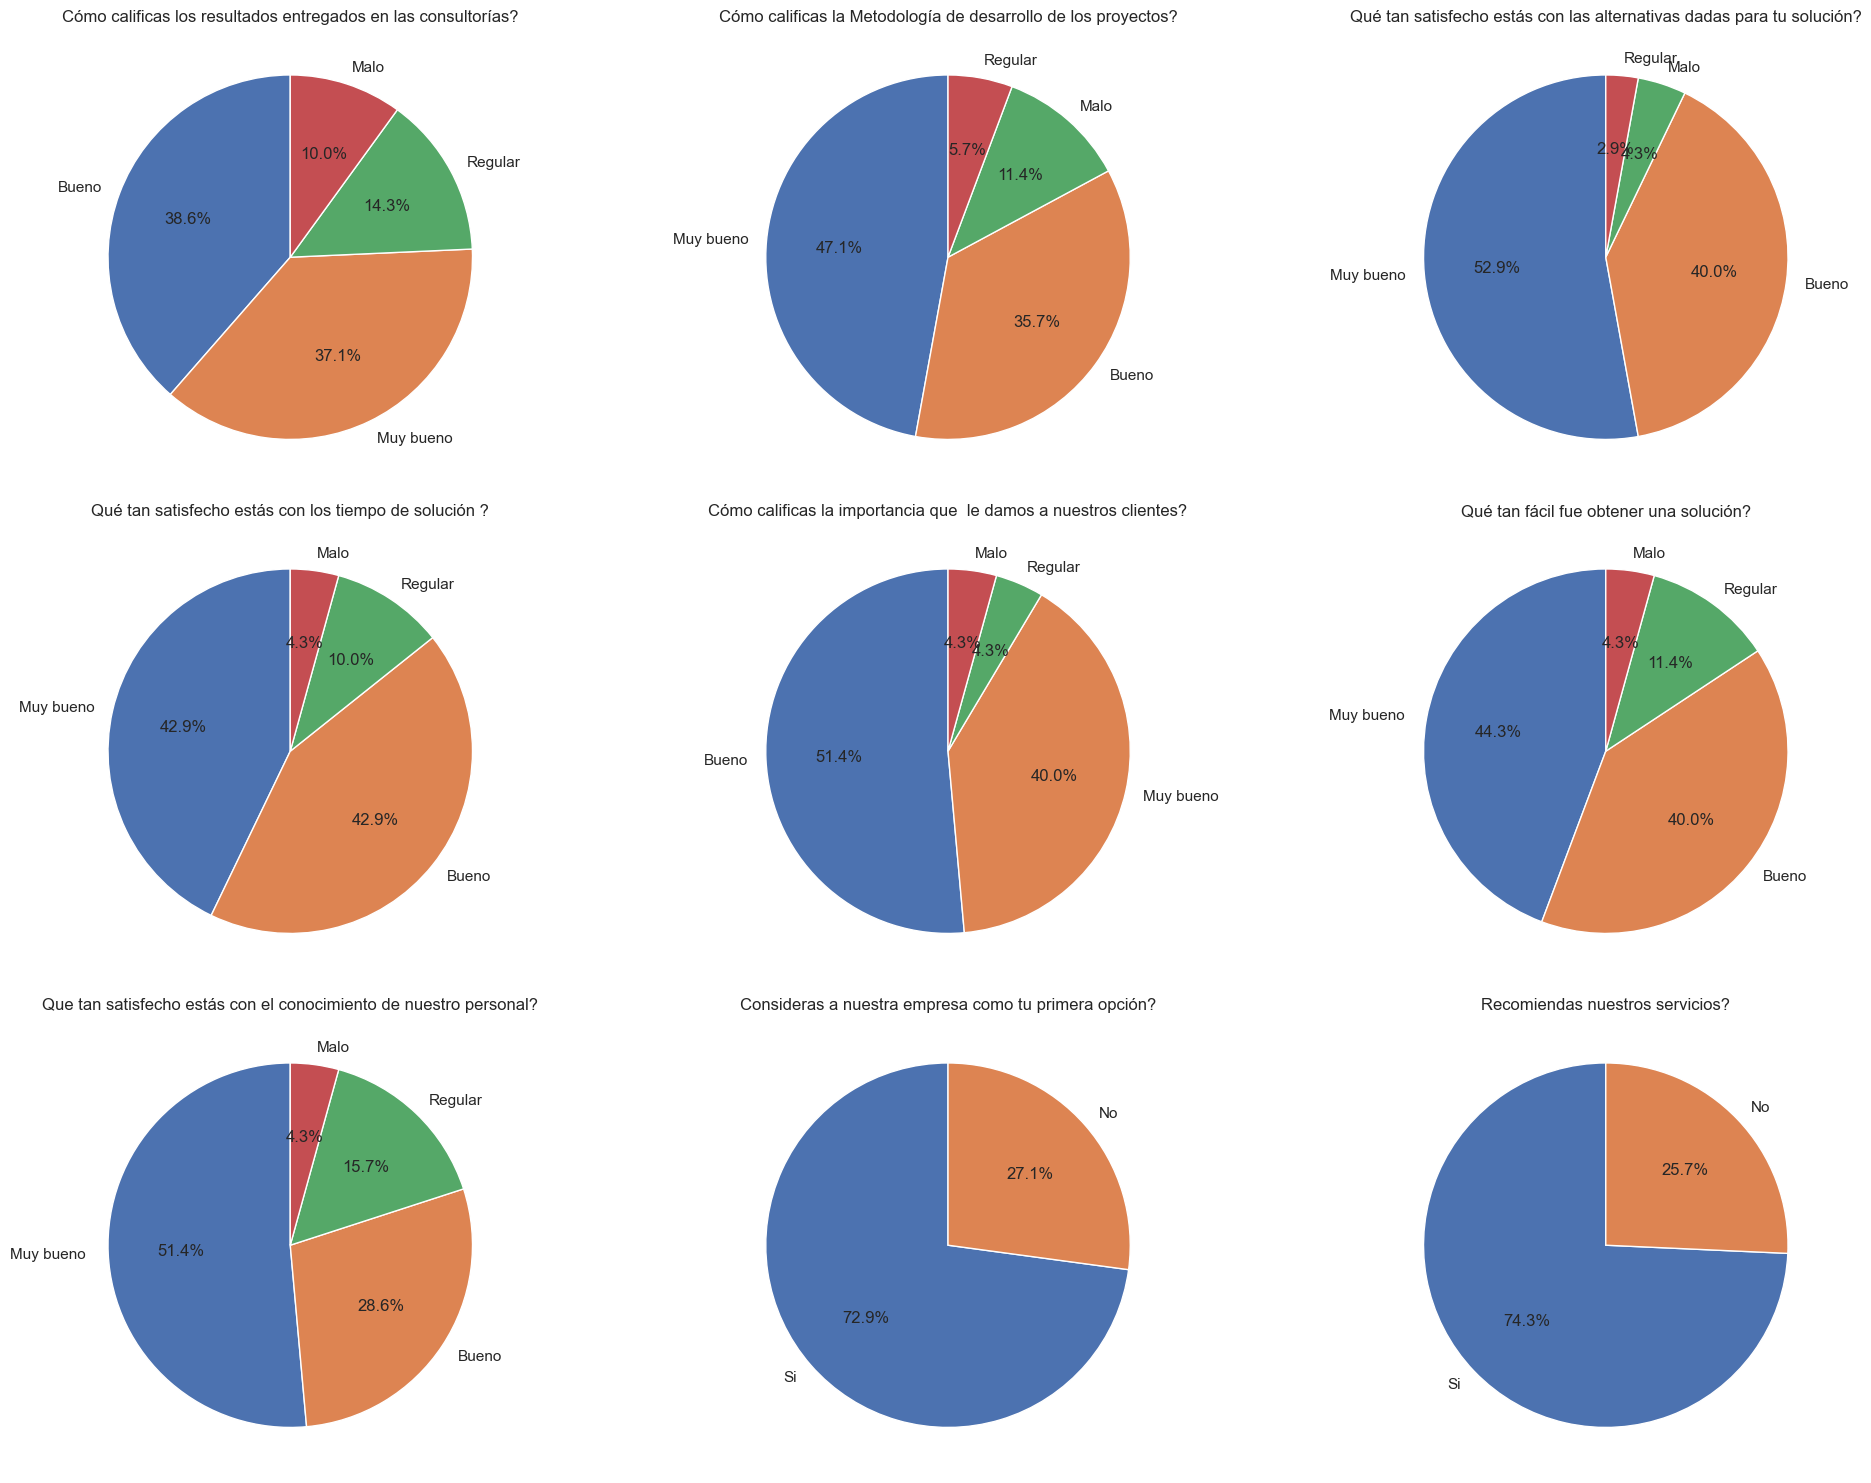

In [14]:
# especificando el numero de categorias a mostrar
max_categories = 5

# obteniendo las variables categoricas
cat_cols = [col for col in df.columns if col != "y" and df[col].dtype == "object"]

# creando una figura con los subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# ajuste de indexación
axs = axs.flatten()

# creando un grafico de torta por cada variable categorica
for i, col in enumerate(cat_cols):
    if i < len(axs):
        # obteniendo la frecuencia de las categoricas
        cat_counts = df[col].value_counts()

        # agrupando las categorias
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=["Other"])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # creando el grafico de torta
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct="%1.1f%%", startangle=90)
        axs[i].set_title(f"{col}")

# remueve los subplots que queden vacios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando los espacios entre subplots
fig.tight_layout()

A primera instancia se puede visualizar que más del 70% de las personas encuestadas cataloga la prestación del servicio como buena y recomendaría el servicio, además de considerar a la empresa como su primera opción, lo que puede evidenciar que el servicio prestado es óptimo, más sin embargo todavía existe margen de mejora.

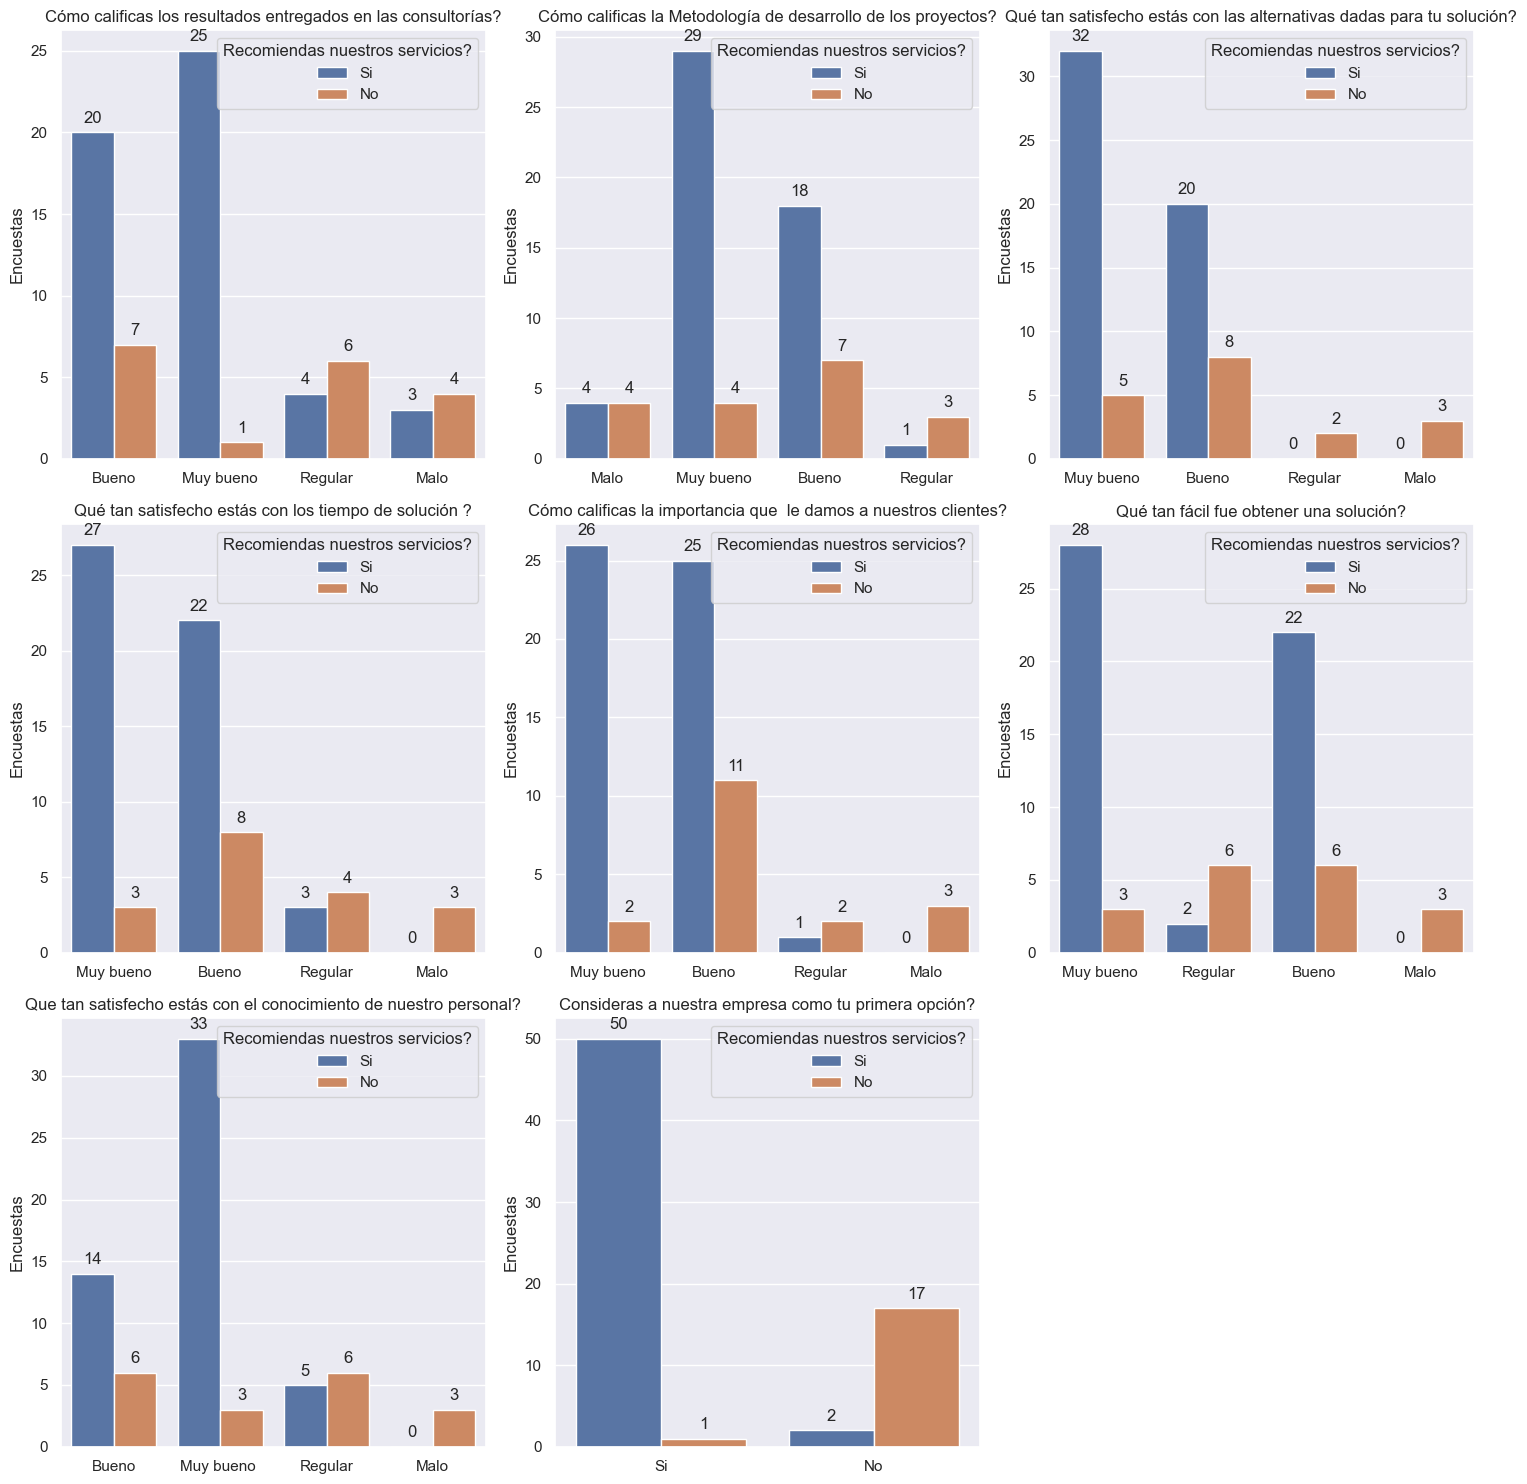

In [15]:
# obteniendo los nombres de las columnas object (columnas categoricas)
cat_vars = df.select_dtypes(include="object").columns.tolist()
exclude_vars = ["Recomiendas nuestros servicios?"]
cat_vars = [var for var in cat_vars if var not in exclude_vars]

# creando una figura con los subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando grafico de barras para cada variable categorica
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    ax = sns.countplot(x=var, data=filtered_df, ax=axs[i], hue="Recomiendas nuestros servicios?")
    axs[i].set_title(var)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Encuestas")
    axs[i].tick_params(axis="x", rotation=0)
    
    # generando etiqueta de datos
    for valor in ax.patches:
        ax.annotate(f"{int(valor.get_height())}", 
                (valor.get_x() + valor.get_width() / 2., valor.get_height()),
                ha="center", va="center", xytext=(0, 10), textcoords="offset points")

# remueve los subplots que queden vacios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando los espacios entre subplots
fig.tight_layout()

Tras realizar un análisis categórico de las variables con respecto a la variable objetivo se puede definir lo siguiente:

- Al catalogar como una "Buena" o "Muy Buena" alguna de las preguntas, hay un alto porcentaje de que esa persona recomiende el servicio.
- Inversamente proporcional al punto anterior, cuando una persona cataloga la pregunta como "Mala" o "Muy mala", es muy probable que la persona no recomiende el servicio prestado.
- Con respecto al servicio catalogado como "Regular" existe un margen de mejora ya que se puede visualizar que están medianamente equilibradas las encuestas de las personas con respecto a si recomendaría el servicio o no.

#### Análisis numérico

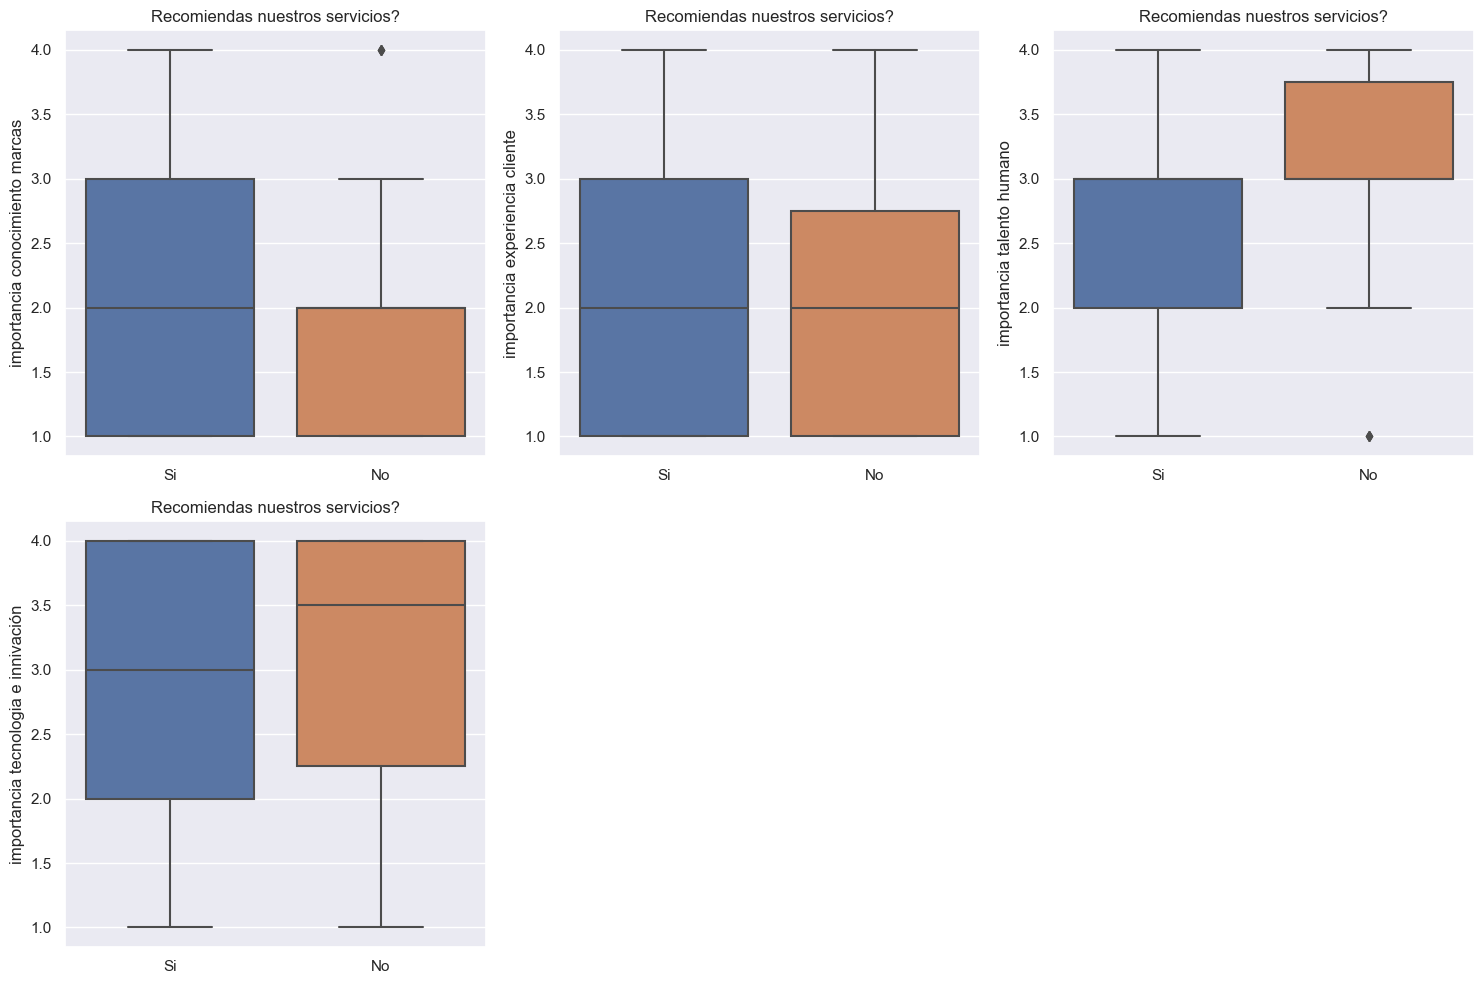

In [16]:
# obteniendo el nombre de las columnas int y float
int_vars = df.select_dtypes(include=["int", "float"]).columns.tolist()
int_vars = [col for col in int_vars if col != "Recomiendas nuestros servicios?"]

# creando una figura con los subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando un grafico de caja por cada variable numerica
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x="Recomiendas nuestros servicios?", data=df, ax=axs[i])
    axs[i].set_title("Recomiendas nuestros servicios?")
    axs[i].set_xlabel("")

# remueve los subplots que queden vacios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando los espacios entre subplots
fig.tight_layout()

Luego se analizar los gráficos de cajas se evidencia lo siguiente:

- Importancia del conocimiento de la marca: Se puede visualizar en la distribución que mientras más alto es el puntaje que se le da a esta variable, existe más posibilidades de que la persona recomiende el servicio.
- importancia de la experiencia del cliente: A pesar de que compartan la misma mediana, existe un aumento en la probabilidad de que la persona recomiende el servicio cuando da un mejor puntaje a la experiencia del cliente.
- Importancia del talento humano: Acá se visualiza algo muy particular y es que las personas que puntuaron a la experiencia del talento humano con mayor puntaje no recomendaron el servicio, una hipotésis para este caso puede ser que la persona estaba desinteresada en realizar esta encuesta y no fue arbitrario en su puntuación, de igual forma es adecuado hacer seguimiento a este patrón inusual.
- Importancia de la tecnología y la innovación: Existe la misma particularidad que el punto anterior, se debe realizar seguimiento a este patrón.

# Conversión de variables categóricas a numéricas

In [17]:
df.head()

,importancia conocimiento marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,Consideras a nuestra empresa como tu primera opción?,Recomiendas nuestros servicios?
0,2.0,3.0,4.0,1.0,Bueno,Malo,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Si,Si
1,3.0,1.0,2.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Si,Si
2,1.0,2.0,4.0,3.0,Bueno,Muy bueno,Muy bueno,Bueno,Bueno,Regular,Bueno,No,No
3,2.0,1.0,3.0,4.0,Regular,Bueno,Muy bueno,Bueno,Bueno,Muy bueno,Bueno,No,No
4,2.0,3.0,1.0,4.0,Muy bueno,Muy bueno,Muy bueno,Muy bueno,Bueno,Muy bueno,Bueno,Si,Si


In [18]:
# visualizando los valores de las columnas categoricas
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].unique()}")

Cómo calificas los resultados entregados en las consultorías?: ['Bueno' 'Muy bueno' 'Regular' 'Malo']
Cómo calificas la Metodología de desarrollo de los proyectos?: ['Malo' 'Muy bueno' 'Bueno' 'Regular']
Qué tan satisfecho estás con las alternativas dadas para tu solución?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Qué tan satisfecho estás con los tiempo de solución ?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Cómo calificas la importancia que  le damos a nuestros clientes?: ['Muy bueno' 'Bueno' 'Regular' 'Malo']
Qué tan fácil fue obtener una solución?: ['Muy bueno ' 'Regular' 'Bueno' 'Malo']
Que tan satisfecho estás con el conocimiento de nuestro personal?: ['Bueno' 'Muy bueno ' 'Regular' 'Malo']
Consideras a nuestra empresa como tu primera opción?: ['Si' 'No']
Recomiendas nuestros servicios?: ['Si' 'No']


In [19]:
# transformando los datos categóricos a númericos
df["Cómo calificas los resultados entregados en las consultorías?"] = df["Cómo calificas los resultados entregados en las consultorías?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno":3})
df["Cómo calificas la Metodología de desarrollo de los proyectos?"] = df["Cómo calificas la Metodología de desarrollo de los proyectos?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno":3})
df["Qué tan satisfecho estás con las alternativas dadas para tu solución?"] = df["Qué tan satisfecho estás con las alternativas dadas para tu solución?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno":3})
df["Qué tan satisfecho estás con los tiempo de solución ?"] = df["Qué tan satisfecho estás con los tiempo de solución ?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno":3})
df["Cómo calificas la importancia que  le damos a nuestros clientes?"] = df["Cómo calificas la importancia que  le damos a nuestros clientes?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno":3})
df["Qué tan fácil fue obtener una solución?"] = df["Qué tan fácil fue obtener una solución?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno ":3})
df["Que tan satisfecho estás con el conocimiento de nuestro personal?"] = df["Que tan satisfecho estás con el conocimiento de nuestro personal?"].map({"Malo":0, "Regular":1, "Bueno":2, "Muy bueno ":3})
df["Consideras a nuestra empresa como tu primera opción?"] = df["Consideras a nuestra empresa como tu primera opción?"].map({"No":0, "Si":1})
df["Recomiendas nuestros servicios?"] = df["Recomiendas nuestros servicios?"].map({"No":0, "Si":1})

df.head()

,importancia conocimiento marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,Consideras a nuestra empresa como tu primera opción?,Recomiendas nuestros servicios?
0,2.0,3.0,4.0,1.0,2,0,3,3,3,3,2,1,1
1,3.0,1.0,2.0,4.0,3,3,3,3,3,3,3,1,1
2,1.0,2.0,4.0,3.0,2,3,3,2,2,1,2,0,0
3,2.0,1.0,3.0,4.0,1,2,3,2,2,3,2,0,0
4,2.0,3.0,1.0,4.0,3,3,3,3,2,3,2,1,1


# Correlación entre variables y variable objetivo

#### Mapa de calor

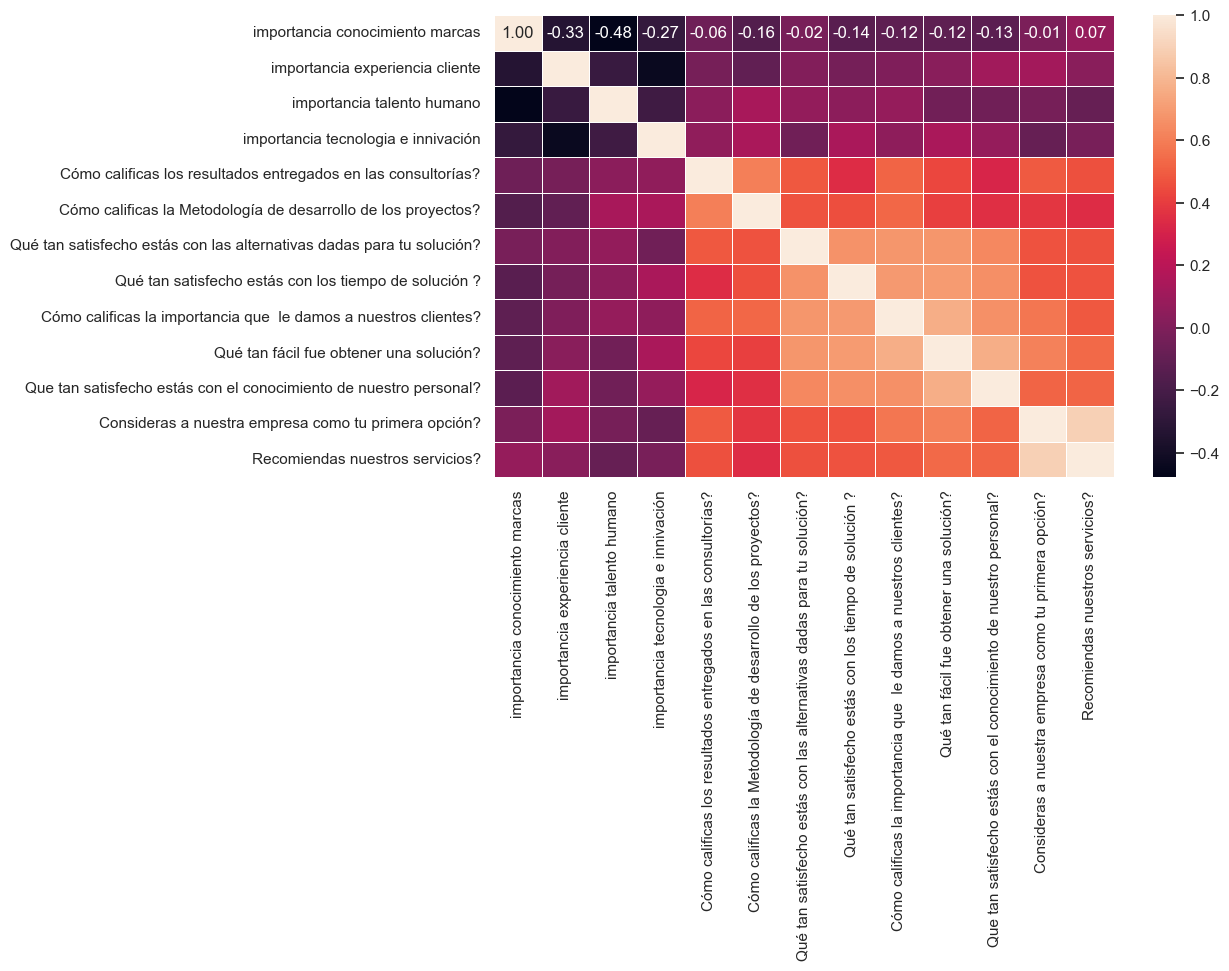

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), fmt=".2f", annot=True, linewidth=.4)
plt.show()

# Train Test Split

In [21]:
X = df.drop("Recomiendas nuestros servicios?", axis=1)
y = df["Recomiendas nuestros servicios?"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construcción del modelo

Usaré los siguientes modelos de aprendizaje automático para predecir si el cliente recomendaría o no el servicio prestado por la empresa:

- Decision Tree Classifier.
- k-Nearest Neightbors (k-NN).

# Decision Tree Classifier

In [22]:
dtree = DecisionTreeClassifier()
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "random_state": [0, 42]
}

# desarrollando un grid search con validación cruzada para encontrar los mejores hiperparametros
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}


In [23]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=0)

In [24]:
dtree.score(X_train, y_train)

0.9795918367346939

# Evaluación del modelo

In [25]:
dtree_pred = dtree.predict(X_test)

In [26]:
print(classification_report(y_pred=dtree_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.94      0.94      0.94        17

    accuracy                           0.90        21
   macro avg       0.85      0.85      0.85        21
weighted avg       0.90      0.90      0.90        21



#### Matriz de confusión

array([[ 3,  1],
       [ 1, 16]], dtype=int64)

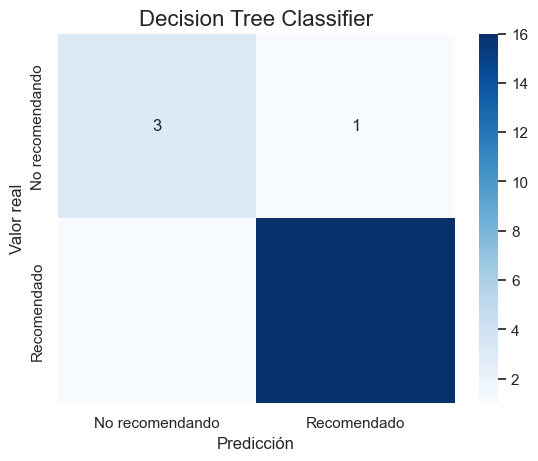

In [27]:
# evaluación del modelo de k-NN
dt = sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, fmt="d", cmap='Blues')
dt.set(ylabel ="Valor real", xlabel="Predicción")
dt.set_xticklabels(["No recomendando", "Recomendado"]) 
dt.set_yticklabels(["No recomendando", "Recomendado"])
plt.title("Decision Tree Classifier", fontsize=16)

confusion_matrix(y_test, dtree_pred)

# k-Nearest Neightbors (k-NN)

In [28]:
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7, 9],  # Valores posibles de k
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
}

# Desarrollando un grid search con validación cruzada para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [29]:
knn = KNeighborsClassifier(metric="manhattan", weights="uniform", n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [30]:
knn.score(X_train, y_train)

0.8979591836734694

# Evaluación del modelo

In [31]:
knn_pred = knn.predict(X_test)

In [32]:
print(classification_report(y_pred=knn_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        17

    accuracy                           0.95        21
   macro avg       0.97      0.88      0.91        21
weighted avg       0.96      0.95      0.95        21



#### Matriz de confusión

array([[ 3,  1],
       [ 0, 17]], dtype=int64)

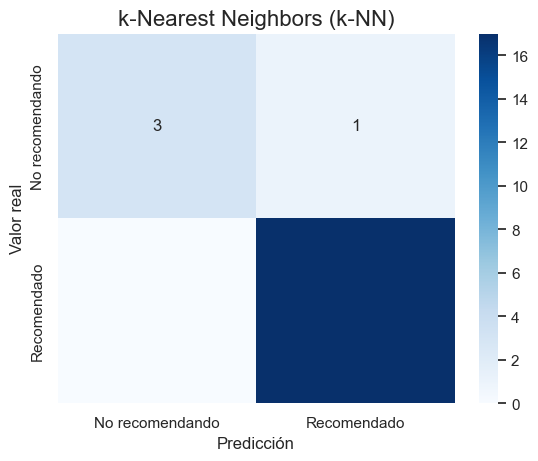

In [33]:
# evaluación del modelo de k-NN
kn = sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", cmap='Blues')
kn.set(ylabel ="Valor real", xlabel="Predicción")
kn.set_xticklabels(["No recomendando", "Recomendado"]) 
kn.set_yticklabels(["No recomendando", "Recomendado"])
plt.title("k-Nearest Neighbors (k-NN)", fontsize=16)

confusion_matrix(y_test, knn_pred)

# Conclusión

Luego de un detallado análisis de las variables del dataset y de como esta influyen en las encuestas, se procedió a la prueba de diferentes modelos de predicción a partir del dataset. A continuación, se resumen las metricas de los modelos evaluados:


| Modelo                     | Precision             | Recall                | F1-score              | Falsos negativos| 
|----------------------------|-----------------------|-----------------------|-----------------------|-----------------|
| Decision Tree              | 0.85                  | 0.85                  | 0.85                  | 1               | 
| k-Nearest Neighbors        | 0.97                  | 0.88                  | 0.91                  | 0               |


El algoritmo de k-NN se considera el más adecuado para realizar la predicción. El k-NN generó una menor cantidad de falsos negativos para la muestra de datos que el modelo de Decision Tree, además de tener mejores métricas en su rendimiento. 

# Sistema de predicción

In [34]:
df.head()

,importancia conocimiento marcas,importancia experiencia cliente,importancia talento humano,importancia tecnologia e innivación,Cómo calificas los resultados entregados en las consultorías?,Cómo calificas la Metodología de desarrollo de los proyectos?,Qué tan satisfecho estás con las alternativas dadas para tu solución?,Qué tan satisfecho estás con los tiempo de solución ?,Cómo calificas la importancia que le damos a nuestros clientes?,Qué tan fácil fue obtener una solución?,Que tan satisfecho estás con el conocimiento de nuestro personal?,Consideras a nuestra empresa como tu primera opción?,Recomiendas nuestros servicios?
0,2.0,3.0,4.0,1.0,2,0,3,3,3,3,2,1,1
1,3.0,1.0,2.0,4.0,3,3,3,3,3,3,3,1,1
2,1.0,2.0,4.0,3.0,2,3,3,2,2,1,2,0,0
3,2.0,1.0,3.0,4.0,1,2,3,2,2,3,2,0,0
4,2.0,3.0,1.0,4.0,3,3,3,3,2,3,2,1,1


In [35]:
def prediccion_recomendacion (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = knn.predict(input_data_reshaped)
    
    print(f'El resultado es {prediction[0]}')

    if (prediction[0]== 0):
      print('La persona no recomendará el servicio')
    else:
      print('La persona recomendará el servicio')

In [36]:
datos_prediccion = (2,3,4,1,2,0,3,3,3,3,2,1) # persona recomendará el servicio
prediccion_recomendacion(datos_prediccion)

El resultado es 1
La persona recomendará el servicio


In [37]:
datos_prediccion = (2.0,1.0,3.0,4.0,1,2,3,2,2,3,2,0) # persona no recomendará el servicio
prediccion_recomendacion(datos_prediccion)

El resultado es 0
La persona no recomendará el servicio
